#  LASSO and Ridge 
---
**for problems with many features**  
**for continuous response variable**  
**for binary response variable**

---
**Background**

In linear regression, the cost function we want to minimize is the error our hypothesis will have: 

$$ 
error = \sum_ 1 ^n(b + wx - y_i)^2  
$$
Oftentimes, we have overfitting problem. For example, in polynomial regression, optimization tends to favor to the high order terms in order to match the training data, the linear term or the low order terms is close to zero.
					
                    
<img src="images/overfitting.PNG"  />                   
                   
For data has many features, we have **the Curse of Dimensionality** problem. In other words, as the number of features increases, the number of data points (or “training examples”) required to train the algorithm increases exponentially. For many features, weights increase exponentially too. 

**We now use Regularization to alleviate these problems**
	
	
   (1). L1 Regularization or LASSO (Least Absolute Shrinkage and Selection Operator) adds “absolute value of magnitude” of coefficient as penalty term to the loss function. The penality term is:
$$
 p(w) = \alpha\sum_{i=1}^d |w_i| 
$$
  
   It shrinks the less important feature’s coefficient to zero. Thus, we can remove some features. 

   (2). L2 Regularization or Ridge: adds “squared magnitude” of coefficient as penalty term to the loss function.

$$
 p(w) = \beta\sum_{i=1}^d |w_i|^2 
$$
  
    
It is good for reducing the overfitting, shrink less important coefficients, reduce the overfitting
	
				
   (3). Elastic Net Regularization: A combination of L1 and L2:
    
$$
 p(w) = \alpha\sum_{i=1}^d |w_i| + \beta\sum_{i=1}^d |w_i|^2 
$$
     



## Comparison of coeficients

   * data: breast cancer dataset
   * algorithms:  
     1) Base: Logistic regression  
     2) with LASSO or L1 Regularization  
     3) with Ridge or L2 Regularization  
     
Finally, we will compare the coeficients of three algorithms

# Base Algorithm: Logistic Regression (OLS)

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

cancer = load_breast_cancer()
print(cancer.data.shape)
print(cancer.target.shape)

(569, 30)
(569,)


In [2]:
# machine learning using logistic regression
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state= 500)
                                                    
model_OLS = LogisticRegression().fit(X_train, y_train)
y_pred = model_OLS.predict(X_test) 

# check  overfitting
y_model = model_OLS.predict(X_train)
print("\nTraining Accuracy score : %.3f" %(accuracy_score(y_train, y_model)))
print("\nTesting Accuracy score : %.3f" %(accuracy_score(y_test, y_pred)))

# print confusion matrix
print(confusion_matrix(y_test, y_pred)) 
model_OLS.coef_


Training Accuracy score : 0.953

Testing Accuracy score : 0.937
[[46  2]
 [ 7 88]]


array([[ 1.94483644e+00,  2.65753588e-01,  1.28527732e-02,
        -4.81686519e-03, -1.01663318e-01, -3.60740144e-01,
        -5.84100408e-01, -2.96983074e-01, -9.71869468e-02,
        -2.59839570e-02, -3.94958246e-02,  1.20926263e+00,
         6.32985114e-01, -1.65695342e-01, -1.25500544e-02,
        -2.29993674e-02, -5.40770225e-02, -3.70513948e-02,
        -3.34718624e-02, -1.48419430e-03,  9.54886316e-01,
        -4.77134830e-01, -1.13260519e-01, -2.31933418e-02,
        -2.10312042e-01, -1.04873829e+00, -1.41143691e+00,
        -5.81155815e-01, -4.53209235e-01, -1.13890396e-01]])

<function matplotlib.pyplot.show(*args, **kw)>

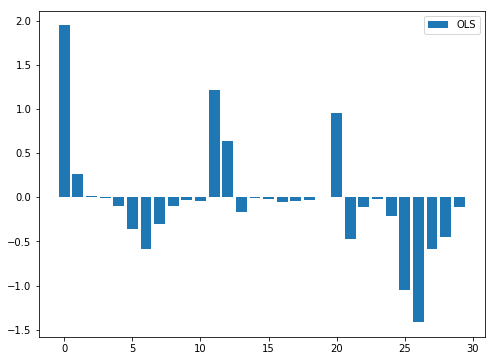

In [3]:
# display coef
%matplotlib inline
import matplotlib.pyplot as plt
features = range(30)

plt.figure(figsize = (8, 6))
plt.bar(features, model_OLS.coef_[0], label = "OLS" )
plt.legend()
plt.show


# LASSO Regression: L1

In [4]:
from sklearn.linear_model import LogisticRegression
model_L1 = LogisticRegression(penalty='l1', solver='liblinear')

model_L1.fit(X_train, y_train)
y_pred_L1 = model_L1.predict(X_test) 


# check  overfitting
y_model = model_L1.predict(X_train)
print("\nTraining Accuracy score : %.3f" %(accuracy_score(y_train, y_model)))
print("\nTesting Accuracy score : %.3f" %(accuracy_score(y_test, y_pred_L1) ) )

# print confustion matrix
print(confusion_matrix(y_test, y_pred_L1)) 
model_L1.coef_



Training Accuracy score : 0.962

Testing Accuracy score : 0.944
[[47  1]
 [ 7 88]]


array([[ 4.39295757,  0.24032655, -0.27075551, -0.01212577,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.42651177,  0.26028944, -0.14219828,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.49205632, -0.02199005, -0.01990004,  0.        ,
         0.        , -2.86475211,  0.        ,  0.        ,  0.        ]])

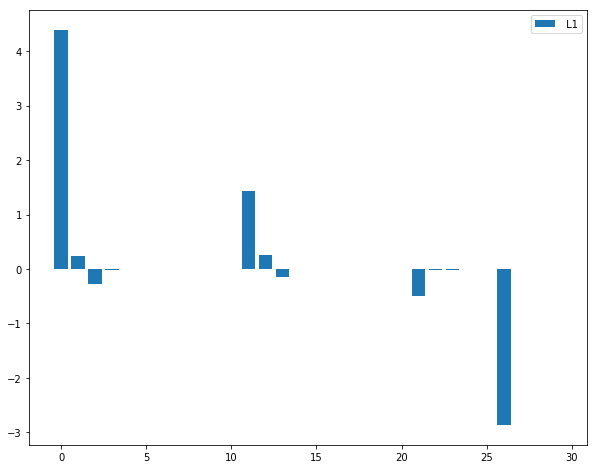

In [5]:
# L1
plt.figure(figsize = (10, 8))
plt.bar(features, model_L1.coef_[0], label = ' L1')
plt.legend()
plt.show()


# Ridge Regression: L2

In [6]:
# for Ridge regression
from sklearn.linear_model import RidgeClassifier 
model_L2 = RidgeClassifier().fit(X_train, y_train)
y_pred_L2 = model_L2.predict(X_test) 

# check  overfitting
y_model = model_L2.predict(X_train)
print("\nTraining Accuracy score : %.3f" %(accuracy_score(y_train, y_model)))
print("\nTesting Accuracy score : %.3f" %(accuracy_score(y_test, y_pred_L2)))

# confusion matrix
print(confusion_matrix(y_test, y_pred_L2)) 
model_L2.coef_


Training Accuracy score : 0.951

Testing Accuracy score : 0.979
[[47  1]
 [ 2 93]]


array([[ 0.54678396,  0.00625164, -0.02851854, -0.00279918, -0.21447309,
         0.10836669, -0.34060008, -0.43496759, -0.14764019,  0.0029619 ,
        -0.68454983, -0.0257339 ,  0.03867114,  0.00128181, -0.08147346,
         0.18332269,  0.42170864, -0.04697208, -0.06945746,  0.01645684,
        -0.59413838, -0.02756122,  0.01298859,  0.00301788, -0.53430273,
        -0.16885153, -0.59328917, -0.71596012, -0.49535413, -0.11067246]])

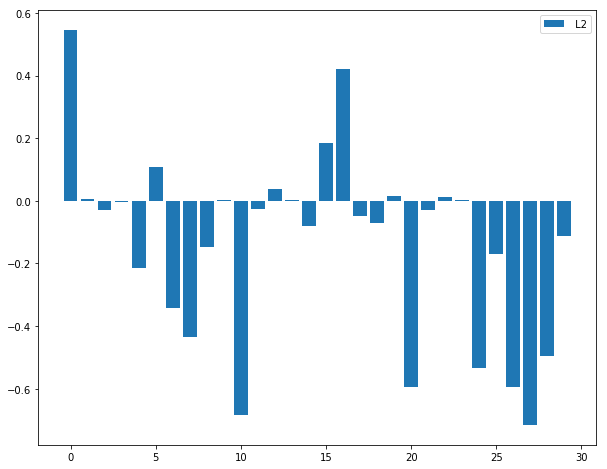

In [7]:
# L2
plt.figure(figsize = (10, 8))
plt.bar(features, model_L2.coef_[0], label = ' L2')
plt.legend()
plt.show()

## COMPARISON: OLS, L1 and L2
---

OLS: every feature contributes to the linear equation, more or less.  
L1:  shrink the feature size by reducing the unimportant features to zero. At same time,  important feature weighs more.   
L2:  reduce all features magtitudes, less overfitting.   

In [8]:
print( "          OLS        L1     L2")
for i in range(len(model_OLS.coef_[0] ) ):
    print('i= {:2d} {:8.4f} {:8.4f} {:8.4f}'.format(i, model_OLS.coef_[0][i], model_L1.coef_[0][i], model_L2.coef_[0][i]) )

          OLS        L1     L2
i=  0   1.9448   4.3930   0.5468
i=  1   0.2658   0.2403   0.0063
i=  2   0.0129  -0.2708  -0.0285
i=  3  -0.0048  -0.0121  -0.0028
i=  4  -0.1017   0.0000  -0.2145
i=  5  -0.3607   0.0000   0.1084
i=  6  -0.5841   0.0000  -0.3406
i=  7  -0.2970   0.0000  -0.4350
i=  8  -0.0972   0.0000  -0.1476
i=  9  -0.0260   0.0000   0.0030
i= 10  -0.0395   0.0000  -0.6845
i= 11   1.2093   1.4265  -0.0257
i= 12   0.6330   0.2603   0.0387
i= 13  -0.1657  -0.1422   0.0013
i= 14  -0.0126   0.0000  -0.0815
i= 15  -0.0230   0.0000   0.1833
i= 16  -0.0541   0.0000   0.4217
i= 17  -0.0371   0.0000  -0.0470
i= 18  -0.0335   0.0000  -0.0695
i= 19  -0.0015   0.0000   0.0165
i= 20   0.9549   0.0000  -0.5941
i= 21  -0.4771  -0.4921  -0.0276
i= 22  -0.1133  -0.0220   0.0130
i= 23  -0.0232  -0.0199   0.0030
i= 24  -0.2103   0.0000  -0.5343
i= 25  -1.0487   0.0000  -0.1689
i= 26  -1.4114  -2.8648  -0.5933
i= 27  -0.5812   0.0000  -0.7160
i= 28  -0.4532   0.0000  -0.4954
i= 29  -0.11

<function matplotlib.pyplot.show(*args, **kw)>

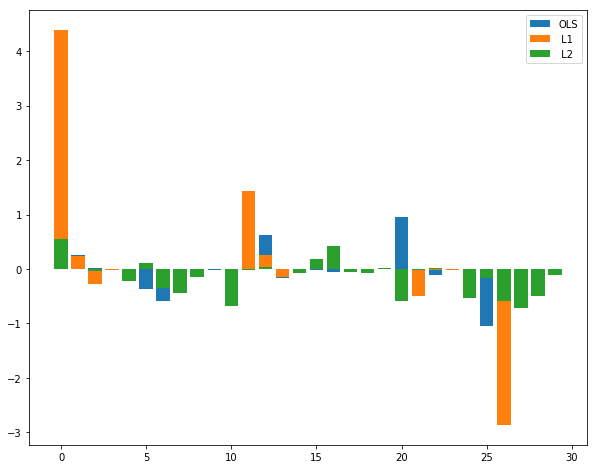

In [9]:
# comparison
plt.figure(figsize = (10, 8))
plt.bar(features, model_OLS.coef_[0], label = "OLS" )
plt.bar(features,  model_L1.coef_[0], label = ' L1')
plt.bar(features,  model_L2.coef_[0], label = ' L2')

plt.legend()
plt.show

We can see:

Using regulariztion, the models we got have high accuracy. The L2 model performs even better than L1 in this case. Regarding the feature selection, L1 reduces the feature number from 31 to 8. For overfitting, we still can see it in OSL and L1 model, but not L2 model. 

- OLS: every feature contributes to the linear equation, more or less.  
  
- with L1:  shrink the feature size by reducing the unimportant features to zero. At same time, important feature weighs more.  
      
- with L2:  reduce all features magtitudes, less overfitting even no more overfitting. 

# END